In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib
matplotlib.style.use('ggplot') 
n=12 # number of colors
colors=cm.rainbow(np.linspace(0,1,n))

In [97]:
file_mcscan = './Ca2Ca.collinearity.kaks'
file_gff    = './Ca2Ca.gff'

df         = pd.read_csv(file_mcscan,sep='\t',comment='#',header=None)
df.columns = ['synID','GeneA','GeneB','EV','Ka','Ks']

df['syn_block_#'] = df['synID'].apply(lambda x :x.split('-')[0])

df['GeneA_chr']   = df['GeneA'].apply(lambda x : int(x.split('g')[0].replace('mRNA.CA','')))
df['GeneB_chr']   = df['GeneB'].apply(lambda x : int(x.split('g')[0].replace('mRNA.CA','')))

df_gff = pd.read_csv(file_gff,header=None,sep='\t')
df_gff.set_index(1,inplace=True)

df['GeneA_loc']   = df['GeneA'].apply(lambda x : df_gff.loc[x][2])

mask = (df['Ks'].astype(float) >= 0)
df = df[mask]

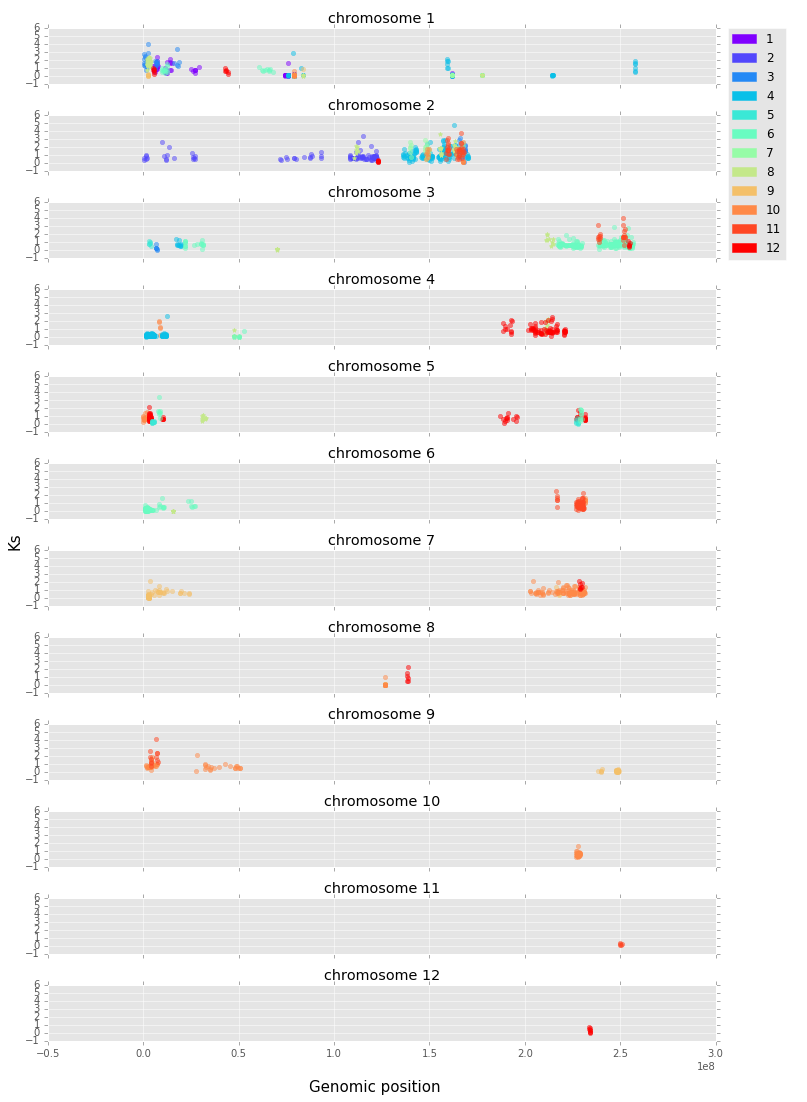

In [98]:
chromosome_list = list(set(df['GeneA_chr']))
fig, ax = plt.subplots(len(chromosome_list),figsize=(10,15),sharex=True,sharey=True)

for n, echr in enumerate(chromosome_list):
    mask = (df['GeneA_chr'] == echr)
    edf  = df[mask]
    for tchr in list(set(edf['GeneB_chr'])):
        mask = edf['GeneB_chr'] == tchr
        eedf = edf[mask]
        if tchr == 8:
            ax[n].scatter(eedf['GeneA_loc'],eedf['Ks'],color=colors[tchr-1],marker=(5, 1))#,s=len(eedf))
        else:
            ax[n].scatter(eedf['GeneA_loc'],eedf['Ks'],color=colors[tchr-1],alpha=0.5)#,s=len(eedf))
        ax[n].set_title('chromosome %s'%echr)
        
        
fig.text(0.5, -0.01, 'Genomic position', ha='center',fontsize=15)
fig.text(-0.01, 0.5, 'Ks', va='center', rotation='vertical',fontsize=15)
plt.figlegend([mpatches.Patch(color=colors[x-1]) for x in chromosome_list],chromosome_list,bbox_to_anchor=[1.1,1],loc='upper right')
plt.tight_layout()

In [100]:
df.head(50)

,synID,GeneA,GeneB,EV,Ka,Ks,syn_block_#,GeneA_chr,GeneB_chr,GeneA_loc
0,0- 0:,mRNA.CA01g20320,mRNA.CA01g22920,7.000000e-53,0.043222,0.073830,0,1,1,161827363
1,0- 1:,mRNA.CA01g20350,mRNA.CA01g22950,3.000000e-68,0.219676,0.039243,0,1,1,161831506
2,0- 2:,mRNA.CA01g20360,mRNA.CA01g22970,3.000000e-55,0.189660,0.059592,0,1,1,161832999
3,0- 3:,mRNA.CA01g20380,mRNA.CA01g22980,2.000000e-144,0.083654,0.064119,0,1,1,161837609
4,0- 4:,mRNA.CA01g20410,mRNA.CA01g23000,3.000000e-103,0.030420,0.035163,0,1,1,161847616
5,0- 5:,mRNA.CA01g20430,mRNA.CA01g23020,5.000000e-132,0.044981,0.019719,0,1,1,161851359
6,0- 6:,mRNA.CA01g20470,mRNA.CA01g23050,2.000000e-68,0.144412,0.101388,0,1,1,161856777
7,0- 7:,mRNA.CA01g20500,mRNA.CA01g23060,4.000000e-70,0.118106,0.103029,0,1,1,161862931
8,0- 8:,mRNA.CA01g20520,mRNA.CA01g23070,3.000000e-174,0.021579,0.020775,0,1,1,161871552
9,0- 9:,mRNA.CA01g20570,mRNA.CA01g23120,2.000000e-116,0.077906,0.051626,0,1,1,161891917
